# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Exercicio 1. (0.5 pontos) **********

Formule ao menos duas perguntas que você acha que poderiam ser respondidas usando os dados

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

Hipóteses:
1. No mercado imobiliário, o lema "localização, localização, localização" é sempre citado. Será mesmo que a localização influe mesmo no preço das casas?
2. Outro fator determinante de preços no mercado imobiliário é o tamanho do terreno e área útil (ou construída). Parece lógico, mas se eu quiser vender um imóvel, posso apenas considerar área construída e área do terrno como fatores principais na hora de precificar minha casa?


# Exercicio 2. (2.5 pontos)

A capacidade de comunicação é um dos principais pontos na análise de dados, pois sua análise deve ser tão boa quanto a sua capacidade de comunicá-la. Para isso usamos tabelas resumo e gráficos para apresentar os principais achados do trabalho realizado. Podemos adicionar outros materias que possam aprofundar essa apresentação como artigos e outros estudos realizados.

Assim, qual visualização você acha interessante destacar?

**RESPOSTA** (VALE 0.75 pontos): (responda aqui, dê dois cliques para editar)

Inicialmentem, serão gerados os seguintes gráficos:
1. latitude x preço
2. longitude x preço
3. Área construíde x preço
4. Área do terreno x preço

In [6]:
#### (VALE 1.5 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

### Distribuição de latitude e longitude vesus preço das casas

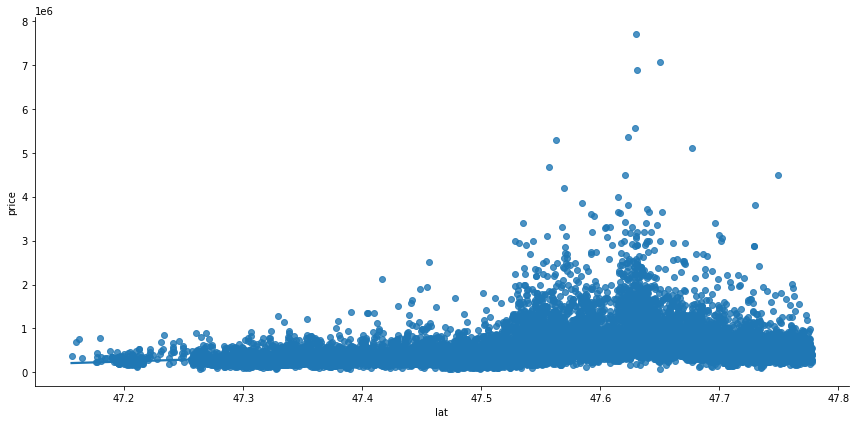

In [7]:
fig = sns.lmplot(data=df, x='lat', y='price', height=6, aspect=12/6)

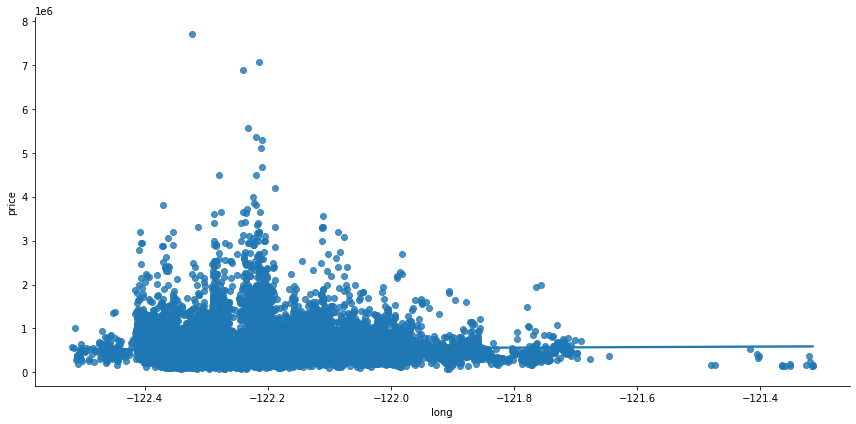

In [8]:
fig = sns.lmplot(data=df, x='long', y='price', height=6, aspect=12/6)

### Calculando a distância direta dos imóveis para Seattle


observando os gráficos anteriores, é possível notar que os imóveis se concentram ao Norte (pela latitude) e a Oeste (segundo a longitude), portanto a Noroeste. Sabendo que Seattle, um importante centro urbano de King county, fica na região Noroeste, podemos lançar a seguinte hipótese: As casas tem seus valores influenciados pela distância até Seattle?

Para tentar responder a essa pergunta, será calculada a distância direta do imóvel à coordenada cartográfica de Seattle:

Coordenadas de Seattle:

latitude = 47.608013

longitude = -122.335167

fonte: <https://www.latlong.net/place/seattle-wa-usa-2655.html>

In [9]:
seattle = {"lat": 47.608013, "long": -122.335167}

In [10]:
def dist_seattle(lat, long):
     return ((seattle["lat"] - lat)**2 + (seattle["long"]  - long)**2)**.5

In [11]:
d_seattle = []
for index, row in df.iterrows():
    d = dist_seattle(row["lat"], row['long'])
    d_seattle.append(d)
df["d_seattle"] = d_seattle

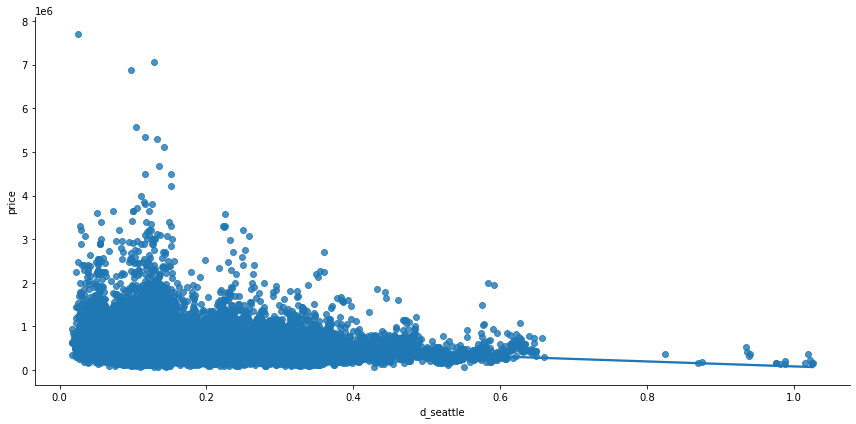

In [12]:
fig = sns.lmplot(data=df, x='d_seattle', y='price', height=6, aspect=12/6)

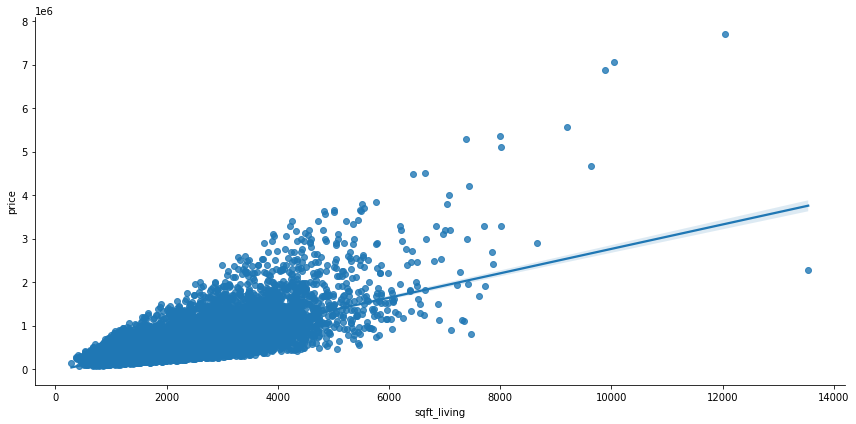

In [13]:
fig = sns.lmplot(data=df, x='sqft_living', y='price', height=6, aspect=12/6)

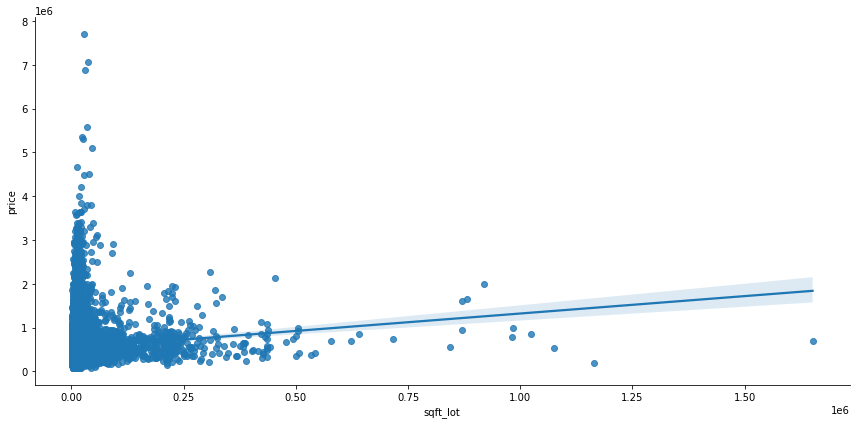

In [14]:
fig = sns.lmplot(data=df, x='sqft_lot', y='price', height=6, aspect=12/6)

A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

**RESPOSTA** (VALE 0.75 pontos): (responda aqui, dê dois cliques para editar)

Verificando os gráficos de latitude e longitude em relação ao preço, é possível notar primeiramente a distribuição das casas. Para a latitude, quanto maior o valor, mais ao **Norte** se localizam as casas. Ao mesmo tempo, para os valores de longitude, quanto menor o valor, mais a **Oeste** se localizam os imóveis. Portanto, é possível inferir que os imóveis se localizam na região **noroeste** de King County. 
Uma análise rápida no mapa da região nos leva a formular a hipótese de que os imóveis em King County se concentram em torno de Seattle, um grande centro urbano.

![mapa de king county](https://content.lib.washington.edu/imls/kcsnapshots/images/kc-map.gif "Mapa de King County")

A probabilidade de encontrar um imóvel de alto valor é bem maior quanto mais perto de Seattle ele se localiza, portanto, a localização influencia sim no preço do imóvel, apesar preliminarmente não podermos dizer que seja um fator extremamente determinante, visto o alto número de observações para um mesmo x que variam largamente em preços (eixo y).

A seguir, o gráfico de área contruída (sqft_living) apresenta uma correlação bem acentuada em relação ao preço, enquanto que o gráfico de área do terreno (sqft_lot), apesar de parecer ter uma correlção bem interessante também, possui suas observações muito concentradas no começo do eixo x com valores de preço variando de maneira muito ampla.

Em resumo, é possível dizer que os fatores de localização, área construída e área do terreno influenciam sim o preço das casas, entretanto, não é possível afirmar que são as únicas variáveis determinantes e por consequência, se algum dono quiser vender uma casa, pelo menos em algum lugar de King County, deverá considerar mais fatores como número de quartos, banheiros, etc.

# Exercicio 3. (3 pontos)

Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

In [15]:
#### (VALE 0.75 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
d_seattle        21613
dtype: int64

In [16]:
df.mean(numeric_only=True)

id               4.580302e+09
price            5.400881e+05
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
d_seattle        2.023163e-01
dtype: float64

In [17]:
df.median(numeric_only=True)

id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.910000e+03
sqft_lot         7.618000e+03
floors           1.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.560000e+03
sqft_basement    0.000000e+00
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222300e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
d_seattle        1.808927e-01
dtype: float64

In [18]:
df.quantile(.25)

id               2.123049e+09
price            3.219500e+05
bedrooms         3.000000e+00
bathrooms        1.750000e+00
sqft_living      1.427000e+03
sqft_lot         5.040000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.190000e+03
sqft_basement    0.000000e+00
yr_built         1.951000e+03
yr_renovated     0.000000e+00
zipcode          9.803300e+04
lat              4.747100e+01
long            -1.223280e+02
sqft_living15    1.490000e+03
sqft_lot15       5.100000e+03
d_seattle        9.619242e-02
Name: 0.25, dtype: float64

In [19]:
df.quantile(.75)

id               7.308900e+09
price            6.450000e+05
bedrooms         4.000000e+00
bathrooms        2.500000e+00
sqft_living      2.550000e+03
sqft_lot         1.068800e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        4.000000e+00
grade            8.000000e+00
sqft_above       2.210000e+03
sqft_basement    5.600000e+02
yr_built         1.997000e+03
yr_renovated     0.000000e+00
zipcode          9.811800e+04
lat              4.767800e+01
long            -1.221250e+02
sqft_living15    2.360000e+03
sqft_lot15       1.008300e+04
d_seattle        2.871470e-01
Name: 0.75, dtype: float64

In [20]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados
print(f'Existem {df["id"].count()} observações no conjunto de dados')
print(f'Existem {len(df.columns) - 1 } variaveis no conjunto de dados')  # desconsiderando id
print(f'O tamanho médio das casa é de {round(df["sqft_living"].mean(), 4)} metros quadrados')  #  considerando sqft_living em metros quadrados, segundo dicionário de dados
print(f'A mediana do tamanho das casas é de {df["sqft_living"].median()} metros quadrados')

# Quartis
print(f'primeiro quartil {df["sqft_living"].quantile(.25)} do tamanho das casas')
print(f'terceiro quartil {df["sqft_living"].quantile(.75)} do tamanho das casas')

Existem 21613 observações no conjunto de dados
Existem 21 variaveis no conjunto de dados
O tamanho médio das casa é de 2079.8997 metros quadrados
A mediana do tamanho das casas é de 1910.0 metros quadrados
primeiro quartil 1427.0 do tamanho das casas
terceiro quartil 2550.0 do tamanho das casas


Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

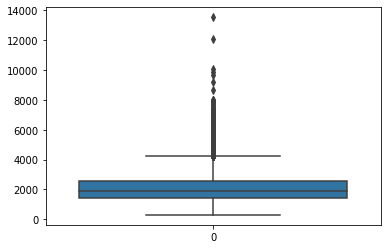

In [21]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

fig = sns.boxplot(data=df["sqft_living"])

Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 

**RESPOSTA** (VALE 0.75 pontos): (responda aqui, dê dois cliques para editar)

Sim, segundo o boxplot, há muitos valores acima do valor máximo (linha horizontal superior que desconsidera outliers).

# Exercicio 4. (4 pontos)

Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [22]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
import statsmodels.api as sm

In [23]:
df.corr()["price"]

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
d_seattle       -0.190974
Name: price, dtype: float64

In [24]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'd_seattle'],
      dtype='object')

In [25]:
X = df[[
        'bedrooms',
        'bathrooms',
        'sqft_living',
        'sqft_lot',
        'floors',
        'waterfront',
        'view',
        'condition',
        'grade',
        'sqft_above',
        'sqft_basement',
        'yr_built',
        'yr_renovated',
        'sqft_living15',
        'sqft_lot15',
        'lat',
        'long'
    ]]

In [26]:
X = sm.add_constant(X)
y= df["price"]

In [27]:
model = sm.OLS(exog= X, endog= y)
results = model.fit()

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [28]:
#### (VALE 0.625 pontos)
#### EXECUTE O COMANDO ABAIXO
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:01:02   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.105      0.000      -4e+07   -3.37e+07
bedrooms      -3.415e+04   1903.178    -17.945      0.000   -3.79e+04   -3.04e+04
bathrooms      4.216e+04   3276.490     12.868      0.000    3.57e+04    4.86e+04
sqft_living     108.7231      2.284     47.607      0.000     104.247     113.199
sqft_lot          0.1274      0.048      2.640      0.008       0.033       0.222
floors          760.6881   3605.813      0.211      0.833   -6306.972    7828.348
waterfront     5.878e+05   1.75e+04     33.625      0.000    5.54e+05    6.22e+05
view           4.943e+04   2146.437     23.028      0.000    4.52e+04    5.36e+04
condition      3.103e+04   2353.444     13.186      0.000    2.64e+04    3.56e+04
grade          9.722e+04   2166.897     44.866      0.000     9.3e+04    1.01e+05
sqft_above       70.7908      2.270     31.191      0.000      66.342      75.239
sqft_basement    37.9320      2.664     14.241      0.000      32.711      43.153
yr_built      -2456.2763     72.580    -33.842      0.000   -2598.539   -2314.014
yr_renovated     21.5324      3.680      5.850      0.000      14.318      28.746
sqft_living15    27.4312      3.457      7.935      0.000      20.655      34.207
sqft_lot15       -0.3933      0.074     -5.330      0.000      -0.538      -0.249
lat            5.611e+05   1.05e+04     53.197      0.000     5.4e+05    5.82e+05
long           -1.17e+05    1.2e+04     -9.755      0.000   -1.41e+05   -9.35e+04
==============================================================================
Omnibus:                    18537.369   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1882235.907
Skew:                           3.617   Prob(JB):                         0.00
Kurtosis:                      48.142   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.26e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Faça outro modelo usando a biblioteca **sklearn**.

In [29]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [30]:
X = df.drop(['id', 'price', 'date', 'zipcode', 'd_seattle'], axis=1)
y = df['price']

In [31]:
X_std = StandardScaler().fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=10)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [35]:
modelo1_metrics = {"r2": r2_score(y_test, y_pred), "MAE": mean_absolute_error(y_test, y_pred)}

Qual o valor de ${R}^{2}$ e $MAE$ obtido?

In [36]:
modelo1_metrics["r2"]

0.7044094087500223

In [37]:
modelo1_metrics["MAE"]

123585.92236276789

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

R² = 0.7044094087500223

MAE = 123585.92236276789

Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [38]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
from sklearn.feature_selection import RFE

In [39]:
X = df.drop(['price', 'id', 'date', 'zipcode', 'd_seattle'], axis = 1)
y = df["price"]

In [40]:
X_std = StandardScaler().fit_transform(X)

In [41]:
selector = RFE(LinearRegression(), n_features_to_select=5, step=1)
selector = selector.fit(X_std, y)

In [42]:
X = X[X.columns[selector.support_]]
X_std = StandardScaler().fit_transform(X)

In [43]:
lr = LinearRegression()

In [44]:
X.columns

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'yr_built'], dtype='object')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=10)

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
modelo2_metrics = {"r2": r2_score(y_test, y_pred), "MAE": mean_absolute_error(y_test, y_pred)}

In [49]:
modelo2_metrics["r2"]

0.6045703861395197

In [50]:
modelo2_metrics["MAE"]

147637.30175064786

Quais são as 5 variaveis mais importantes deste conjunto de dados?

**RESPOSTA** (VALE 0.5 pontos): (responda aqui, dê dois cliques para editar)

Segundo o RFE, as variáveis mais importantes são: **'sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'yr_built'**

In [51]:
X.columns

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'yr_built'], dtype='object')

Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

### R² do Modelo2

In [52]:
modelo2_metrics["r2"]

0.6045703861395197

### MAE do Modelo 2

In [53]:
modelo2_metrics["MAE"]

147637.30175064786

Alguns pontos devem ser considerados ao analizar o R²:
> - O R-Quadrado é, por definição, enviesado. Isso ocorre uma vez que os otimizadores dos algoritmos de regressão utilizam da correlação dos dados forma a incrementar o valor do R-Quadrado injustamente, o que causa um aumento sistemático desse valor conforme novas medidas são adicionadas;
> - Só pode ser aplicada perfeitamente em modelos univariados (com apenas uma variável de entrada, geralmente denominada como X);
> - Em casos de Overfitting, o valor dessa métrica continua alta;
> - Devido ao ponto explicitado acima, apenas o R-Quadrado não consegue indicar se um modelo de regressão é eficiente ou não, o que não nos dá segurança alguma sobre o modelo desenvolvido;

(fonte: <https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96>)

Pelos motivos elucidados acima, deixaremos o R² para comparação entre modelos de lado em um primeiro momento, visto que temos muito mais do que uma variável dentro do modelo. Entretanto, deve-se ressaltar que os Modelos não possuem R² muito próximo de 1, o que indica que não estão em overfitting.

Por ora, será usado apenas o MAE como parâmetro que tem a vantagem de não punir severamente os outliers do modelo e quanto mais próximo de zero, mais o modelo representa os dados reais.

### Métricas dos Modelos 1 e 2

In [54]:
print(f"Modelo 1 ---> MAE = {modelo1_metrics['MAE']}")
print(f"Modelo 2 ---> MAE = {modelo2_metrics['MAE']}")
print(f"Modelo 1 ---> R² = {modelo1_metrics['r2']}")
print(f"Modelo 2 ---> R² = {modelo2_metrics['r2']}")

Modelo 1 ---> MAE = 123585.92236276789
Modelo 2 ---> MAE = 147637.30175064786
Modelo 1 ---> R² = 0.7044094087500223
Modelo 2 ---> R² = 0.6045703861395197


Comparando o MAE dos modelos, temos que o Modelo 1 apresenta um resultado melhor do que o Modelo 2. O que significa que o Modelo 1 se aproxima mais dos dados reais. Entretanto, não é possível extrair uma conclusão definitiva sobre os Modelos 1 e 2, visto que os valores elevados de MAE e diferenças entre sie o único parâmetro de performance é ser mais próximo de 0. É necessário outro parâmetro de comparação, e é aí que entra o R².

Olhando o R² dos modelos, os valores indicam que o Modelo 1 novamente é melhor, visto que seu valor é significantemente mais próximo de 1.

Podemos concluir portanto, que o Modelo 1 é um modelo mair eficiente em prever os valores de preços dos imóveis, provavelmnte por considerar mais variáveis do que o Modelo 2.